In [11]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as nr


import statsmodels.api as sm
import operator
%matplotlib inline

# K-近邻算法
***
优点：精度高，对异常值不明按、无数拘束儒家定
缺点：计算复杂度高，空间复杂度高
适用数据范围：数值形和标称型
懒惰学习，没有明显的学习过程

通过一则小故事来学习KNN算法，
有一种兔子叫悲伤（Grief），平均身高50cm，体重5kg
有一种兔子叫痛苦（Agony），平均身高30cm，体重4kg
有一种兔子叫绝望（Despair），平均身高45cm，体重2.5kg
可以看到在这些数据中，每只兔子都有二元特征（身高体重），兔子的品种是分类的标签
**算法：**现在有一只来自北京十八环外的兔子，我们要判断这只兔子的类别。按照KNN算法，我们去寻找离他最近的k个数据样本进行分析，如果其中大多数都属于某一类别，就判定这只兔子的类别为该类型，

In [12]:
grief_heights=nr.normal(50,6,100)
grief_weights=nr.normal(5,0.5,100)
agony_heights=nr.normal(30,6,100)
agony_weights=nr.normal(4,0.5,100)
despair_heights=nr.normal(45,6,100)
despair_weights=nr.normal(2.5,0.5,100)
fig_size=plt.rcParams['figure.figsize']
fig_size[0]=15
fig_size[1]=10


In [47]:
a=[(1,2),(4,1),(2,9),(3,6)]
a.sort(key=lambda x:x[1])#list.sort(key)进行排序，以x[哪个维度(轴)]
print(a)

[(4, 1), (1, 2), (3, 6), (2, 9)]


> 不是太理解lambda是怎么弄得，后面那部分x[][]...要确定好维度

Text(0,0.5,'体重')

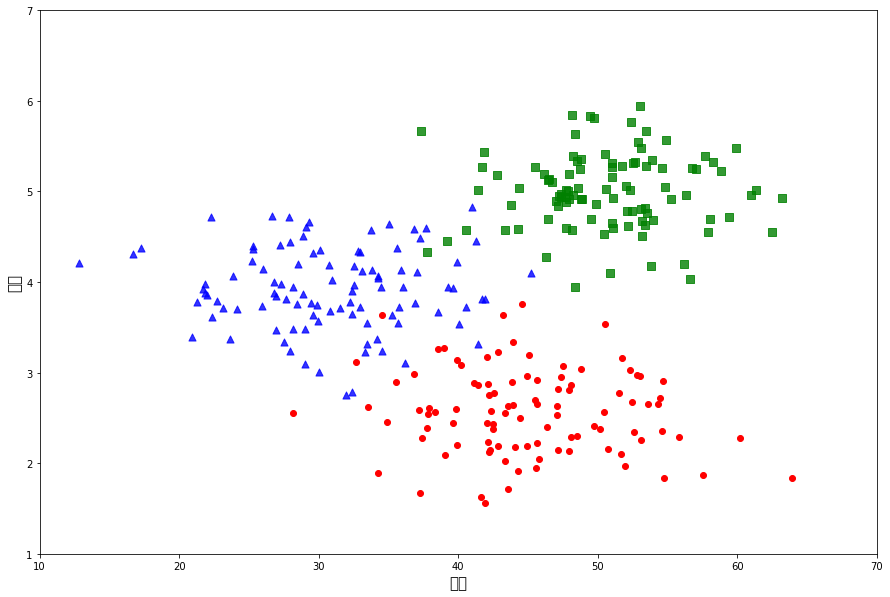

In [13]:
plt.scatter(grief_heights,grief_weights,c='g',marker='s',s=50,alpha=0.8)
plt.scatter(agony_heights,agony_weights,c='b',marker='^',s=50,alpha=0.8)
plt.scatter(despair_heights,despair_weights,c='r')
plt.axis((10,70,1,7))#设置x,y轴的范围
plt.xlabel('身高',size=15)
plt.ylabel('体重',size=15)


In [14]:
class kdtree(object):
    def __init__(self,point_list,depth=0,root=None):#递归的创建二叉树
        if len(point_list)>0:
            k=len(point_list[0][0])
            axis=depth%k
            point_list.sort(key=lambda x:x[0][axis])
            point_list.sort(point_list)
            median=len(point_list)
            self.axis=axis
            self.root=root
            self.size=len(point_list)
            self.node=point_list[median]#把节点数据存到自身对象之中，注意每个点还存了颜色
            if len(point_list[:median])>0:#递归生成左枝和右枝
                self.left=kdtree(point_list[:median],depth+1,self)
            else :
                self.left=None
            if len(point_list[median+1:])>0:
                self.right=kdtree(point_list[median+1:],depth+1,self)
            else:
                self.right=None
        else:
            return None
        
    def insert(self,point):
        self.size+=1
        if point[0][self.axis]<self.node[0][self.axis]:
            if self.left!=None:
                self.left.insert(point)
            else:
                self.left=kdtree([point],self.axis+1,self)
        else:
            if self.right!=None:
                self.right.insert(point)
            else:
                self.right=kdtree([point],self.axis+1,self)
                
    def find_leaf(self,point):
        if self.left==None and self.right==None:
            return self
        elif self.left==None:
            return self.right.find_leaf(point)
        elif point[self.axis]<self.node[0][self.axis]:
            return self.left.find_leaf(point)
        else:
            return self.right.find_leaf(point)

    def knearest(self, point, k=1, dist=lambda x,y: sum(map(lambda u,v:(u-v)**2,x,y))):
        leaf=self.find_leaf(point)
        return leaf.k_down_up(point,k,dist,result=[],stop=self,visited=None)

    def k_down_up(self,point,k,dist,result=[],stop=None,visited=None):
        if result==[]:#建立一个result集来临时存储找到的k个近邻点，记录最大的距离
            max_dist=0
        else:
            max_sit=max([x for x in result])
        other_result=[]
        if (self.left==visited and self.node[0][self.axis]-point[self.axis]<max_dist and self.right!=None) or (len(result)<k and self.left==visited and self.right!=None):
            other_result=self.right.knearest(point,k,dist)
        if (self.right==visited and point[self.axis]-self.node[0][self.axis]<max_dist and self.left!=None) or(len(result)<k and self.right==visited and self.left!=None):
            other_result=self.left.knearest(point,k,dist)
        result.append((self.node,dist(point,self.node[0])))
        result=sorted(result+other_result,key=lambda pair:pair[1])[:k]
        if self==stop:
            return result
        else:
            return self.root.k_down_up(point,k,dist,result,stop,self)
    def KNN_prob(self,point,label,k,dist=lambda x,y:sum(map(lambda u,v:(u-v)**2,x,y))):
        nearesets=self.knearest(point,k,dist)
        return float(len([pair for pair in nearests if pair[0][1]==label]))/float(len(nearests))
    def KNN(self,point,k,dist=lambda x,y:sum(map(lambda u,v:(u-v)**2,x,y))):
        nearests=self.knearest(point,k,dist)#找到最近的叶子节点，找到之后往上爬
        statistitcs={}
        for data in nearests:
            label=data[0][1]
            if label not in statistics:
                statistics[label]=1
            else:
                statistics[label]+=1
        max_label=max(statistics.iteritems(),key=operator.itemgetter(1))[0]
        return max_label,float(statistics[max_label])/float(len(nearests))


In [53]:

grieves=map(lambda x,y:tuple(((x,y),'g')),grief_heights,grief_weights)
agonies=map(lambda u,v:tuple(((u,v),'g')),agony_heights,agony_weights)
despairs=map(lambda a,b:tuple(((a,b),'g')),despair_heights,despair_weights)
a=np.array(list(grieves))
b=np.array(list(agonies))
c=np.array(list(despairs))

point=list(np.concatenate((grieves,agonies,despairs)))
print (type(point))
tree=kdtree(point)


ValueError: zero-dimensional arrays cannot be concatenated

In [ ]:
all_points=[]
for i in range(100,701):
    for j in range(100,701):
        all_points.append((float(i)/10.,float(j)/10.))
len(all_points)

In [ ]:
def normalized_dist(x,y):
    return (x[0]-y[0])**2+(10*x[1]-10*y[1])**2

In [ ]:
now=datetime.datetime.now()
fifteen_NN_result=[]
for point in all_points:
    fifteen_NN_result.append((point,tree.KNN(point,k=15,dist=normalized_dist)[0]))
print (datetime.datetime.now()-now)

In [ ]:
fifteen_NN_yellow=[]
fifteen_NN_green=[]
fifteen_NN_blue=[]
for pair in fifteen_NN_result:
    if pair[1]=='y':
        fifteen_NN_yellow.append(pair[0])
    if pair[1]=='g':
        fifteen_NN_green.append(pair[0])
    if pair[1]=='b':
        fifteen_NN_blue.append(pair[0])
        

In [ ]:
plt.scatter(40,2.7,c='r',s=200,marker='*',alpha=0.8)
plt.scatter(grief_heights,grief_weights,c='g',marker='s')
plt.scatter(agony_heights,grief_weights,c='b',marker='^')
plt.scatter(despair_heights,despair_weights,c='y')
plt.scatter([x[0] for x in fifteen_NN_yellow],[x[1] for x in fifteen_NN_yellow],s=1,c='yellow')


In [ ]:
def ins

# kd 树算法思路

kd树是一种二叉树结构，可以用来进行高效的KNN计算。
## 前言
kd树是一种包含空间信息的二叉树数据结构，如果特征的样本数量为N，那么一搬来讲kd树算法的复杂度是O(DlogN)，相对于穷举O(DN)省去了非常多的计算量。
kd树每一个节点记载了[特征坐标，切分轴，指向左枝指针，指向右枝指针]
其中，特征坐标是现行空间的一个点
切分轴用一个由一个整数r表示，这里1<r<n,是我们在n维空间中沿第r维进行的一次分割。
节点左枝和右枝都是kd树，并且满足：如果y是左枝的一个特征坐标，那么yr<xr;如果z是右枝的一个特征坐标，那么zr>xr
>也就是说在每个维度N(每个维度)上切分，大于某个特征值的所有数据划为右类，小于的划为左类
**特征坐标**也就是划分点坐标，是二叉树的各个根节点


给定一个数据样本集和切分轴，以下的递归算法将一个基于该数据集的kd树每一个此循环制作一个节点：
-如果|S|=1，记录S中为一个的一个点作为当前节点的特征数据，并且不设左枝和右枝。(递归到最后，该点便是叶子节点了)
-如果|S|>1:
    * 将S内的所有点按照第r个坐标的大小进行排序;
    * 选出该排序厚的中位元素(如果有哦偶数各元素，则选择中位左边或者右边的元素)作为当前节点的特征坐标，并且记录切分轴r;
    * 将SL设为s中所有排列在中位元素之前的元素;SR设为S中所有排列在中位元素之后的元素;
    * 当前节点的左枝设为以SL为数据集并且r为切分轴制作出kd树(相当与此处进行调用递归函数)。再设r=（r+1）mod N(总维度数，相当于轮流切换维度轴进行切分)

## kd树上kNN算法
给定一个构建与一个样本集的kd树，下面的算法可以寻找距离某个点p最近的k个样本。
1. 设L有一个k个空位的列表，用于保存已搜寻到的最近点
2. 根据p的坐标值和每个节点的切分向下搜索，也就是说，如果树的节点按照xr=a进行切分，并且p的坐标r小于a，则向左进行搜索，反之向右。
3. 当到达一个底部节点时，将其标记为访问过。如果L里面不足k个点，将当前节点的特征坐标加入L;如果L不为空并且当前节点的特征与p的距离小于L哩最长的距离，则用当前特征替代L中离p最远的点。
4. 如果当前节点不是整棵树顶端的节点，执行(a);反之，输出L算法完成
    a.向上爬一个节点，如果当前节点未曾被访问过，将其标记为访问过，然后执行2和3;如果当前节点被访问过，再次执行(a).
    (1).如果此时L里不足k个点，则将节点特征加入L;如果L已经满k个点，且当前节点与p的距离小于L哩最长的距离，则用节点特征替换掉L中离最远的点。
    (2).计算p和当前节点切分线的距离，如果该距离大于等于L中距离p最远的距离并且L中已经有k个点，则在切分线的另一边不会有更近的点，执行4;如果该距离小于L中最远的距离或者L中不足k个点，则切分线另一边可能有更近的点，因此在当前节点的另一枝从2.开始执行


>假设给了N个未知点，已知样本为N个，时间复杂度o(N*logN),树的深度为logN，计算无非是在树各个枝干之间上上下下，比起传统的计算每两个点之间的距离比起来，复杂度是大大减少

In [ ]:
help(plt.scatter)